<a href="https://colab.research.google.com/github/jajapuramshivasai/QOSF-Screening-Task/blob/main/Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

________
#1) Naive simulation using matrix multiplication
________

In [1]:
import numpy as np



X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
H = np.array([[1, 1], [1, -1]]) / np.sqrt(2)
I = np.eye(2)

P0 = np.array([[1, 0], [0, 0]])
P1 = np.array([[0, 0], [0, 1]])


def tensor(arr):
    result = arr[0]
    for element in arr[1:]:
        result = np.kron(element, result)
    return result


In [2]:


class Naive_QuantumStateVectorSimulator:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        self.state_vector = np.array([1] + [0] * (2**num_qubits - 1))
        self.ops = []


    def add_X(self, qubit):

        stack = []
        for i in range(self.num_qubits):
            if i == qubit:
                stack.append(X)
            else:
                stack.append(I)
        gate = tensor(stack)
        self.ops.append(gate)


    def add_H(self, qubit):

        stack = []
        for i in range(self.num_qubits):
            if i == qubit:
                stack.append(H)
            else:
                stack.append(I)
        gate = tensor(stack)
        self.ops.append(gate)


    def add_CNOT(self, control_qubit, target_qubit):
      stack_l = []
      stack_r = []
      if control_qubit == target_qubit:
        raise ValueError("Control and target qubits cannot be the same.")
      for i in range(self.num_qubits):

          if i == control_qubit:
              stack_l.append(P0)
              stack_r.append(P1)
          else:
              stack_l.append(I)
              stack_r.append(I)
      stack_r[target_qubit] = X

      cx = tensor(stack_l) +tensor(stack_r)
      self.ops.append(cx)


    def simulate(self):
        for op in self.ops:
            self.state_vector = np.dot(op, self.state_vector)





####example

In [3]:
qc = Naive_QuantumStateVectorSimulator(2)
qc.add_H(0)
qc.add_CNOT(0,1)
statevector = qc.simulate()
print(qc.state_vector)

[0.70710678 0.         0.         0.70710678]


##Plotting Time Complexity

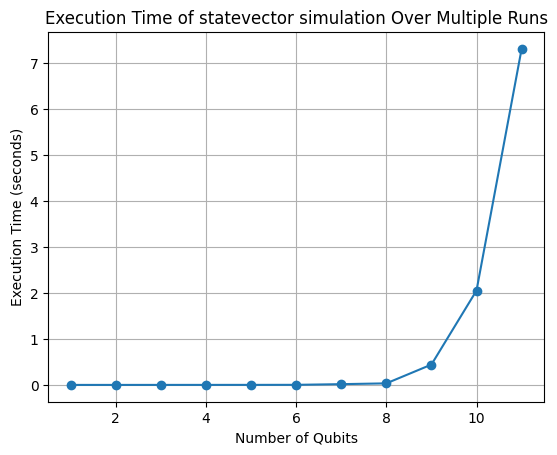

In [4]:
import timeit
import matplotlib.pyplot as plt

max_qubits = 12
times = []
for qubits in range(1,max_qubits):
    # Time the function once per iteration
    qc = Naive_QuantumStateVectorSimulator(qubits)
    for j in range(qubits):
      qc.add_H(j)

    execution_time = timeit.timeit(lambda: qc.simulate(), number=100)
    times.append(execution_time)
    del qc

# Plot the results
plt.plot(range(1,max_qubits), times, marker='o', linestyle='-')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of statevector simulation Over Multiple Runs')
plt.grid()
plt.show()


_________
#2) Advanced simulation using tensor multiplication
________

In [5]:


class Advanced_QuantumStateVectorSimulator:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        self.state_vector = np.array([[1,0]]*num_qubits)

        self.ops = []


    def add_X(self, qubit):

        stack = []
        for i in range(self.num_qubits):
            if i == qubit:
                stack.append(X)
            else:
                stack.append(I)
        gate = stack
        self.ops.append(gate)


    def add_H(self, qubit):

        stack = []
        for i in range(self.num_qubits):
            if i == qubit:
                stack.append(H)
            else:
                stack.append(I)
        gate = stack
        self.ops.append(gate)





    def simulate(self):
        for op in self.ops:
            self.state_vector = np.einsum('ijk,ik->ij',op, self.state_vector)
    def reshape_state(self):
      self.state_vector = np.reshape(self.state_vector,(2**self.num_qubits,1))





###example

In [6]:
qc = Advanced_QuantumStateVectorSimulator(4)
# qc.add_H(0)
qc.add_X(0)
qc.add_X(2)
qc.simulate()
print(qc.state_vector)
del qc

[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


##plotting time complexity

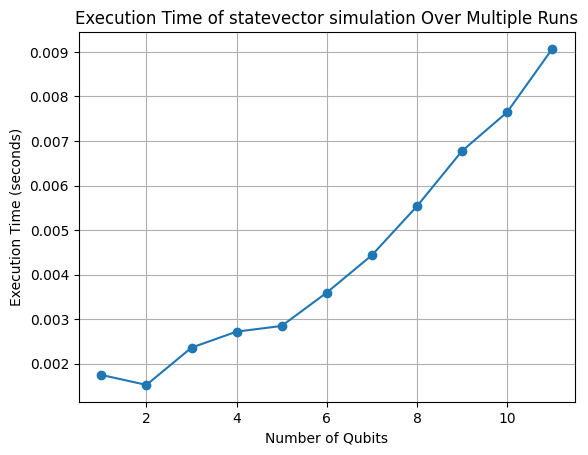

In [9]:

max_qubits = 12
times = []
for qubits in range(1,max_qubits):
    # Time the function once per iteration
    qc = Advanced_QuantumStateVectorSimulator(qubits)
    for j in range(qubits):
      qc.add_H(j)

    execution_time = timeit.timeit(lambda: qc.simulate(), number=100)
    times.append(execution_time)
    del qc

# Plot the results
plt.plot(range(1,max_qubits), times, marker='o', linestyle='-')
plt.xlabel('Number of Qubits')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time of statevector simulation Over Multiple Runs')
plt.grid()
plt.show()


##comparing results naive and tensor based statevector simulator shows that tensor based simulator outperformes naive simulator when there not much entanglement present in the quantum system